Иногда при построении модели линейной регрессии возникают проблемы с её
качеством. Например, модель может хорошо работать на обучающих данных, но плохо
справляться с новыми, что называется переобучением. Это происходит, когда модель
слишком сильно подстраивается под детали обучающего набора, включая шум и
случайные отклонения, вместо того чтобы выявлять общие закономерности.
Регуляризация — это метод улучшения устойчивости модели и предотвращения
переобучения. Она помогает "наказать" модель за слишком сложные зависимости и
заставляет её выбирать более простые решения.

Зачем нужна регуляризация?

Представьте, что вы строите прогноз цен на квартиры. У вас есть множество
факторов: площадь, этаж, район, наличие балкона, возраст здания, расстояние до метро,
вид из окна и даже цвет стен. Некоторые признаки оказывают сильное влияние на цену, а
некоторые — почти никакого. Без регуляризации модель может "цепляться" за
малозначимые детали и делать неверные прогнозы.

Регуляризация помогает выделить действительно важные признаки и "ослабить"
или исключить незначимые.

Ridge-регрессия (L2-регуляризация)

Ridge-регрессия делает модель более устойчивой за счёт "сглаживания"
коэффициентов при признаках. Она не обнуляет их полностью, но уменьшает значение тех,
которые вносят слишком сильный вклад и могут вызывать переобучение.

Пример: Вы прогнозируете стоимость квартиры. Модель считает, что наличие лифта
повышает цену на 1 млн руб., но это слишком сильное влияние. Ridge уменьшит этот вес,
чтобы учесть лифт, но не переоценивать его роль.

Рассмотрим пример кода с использованием **Ridge-регрессии** для
прогнозирования стоимости квартиры, где визуализация покажет влияние признаков до и
после регуляризации:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

In [2]:
# Пример данных о квартирах
data = {
"Площадь": [50, 65, 40, 80, 55, 70, 60, 45],
"Этаж": [3, 5, 2, 7, 4, 6, 3, 1],
"Возраст_дома": [10, 20, 5, 15, 12, 18, 8, 3],
"Наличие_лифта": [1, 1, 0, 1, 0, 1, 0, 0], # 1 — есть лифт, 0 — нет
"Цена": [5500, 6200, 4800, 7500, 5900, 7100, 6000, 4700] # Цена в тыс. руб.
}
# Создание DataFrame
df = pd.DataFrame(data)

In [3]:
# Признаки и целевая переменная
X = df[["Площадь", "Этаж", "Возраст_дома", "Наличие_лифта"]]
y = df["Цена"]

In [4]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Обучаем обычную линейную регрессию
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# Обучаем Ridge-регрессию с регуляризацией
ridge_reg = Ridge(alpha=1000) # Чем больше alpha, тем сильнее "штраф"
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1000)

In [7]:
# Сравнение коэффициентов признаков
coef_df = pd.DataFrame({
"Признак": X.columns,
"Линейная регрессия": lin_reg.coef_,
"Ridge-регрессия": ridge_reg.coef_
})
print(coef_df)

         Признак  Линейная регрессия  Ridge-регрессия
0        Площадь                46.4        33.784486
1           Этаж               112.0         5.106547
2   Возраст_дома                40.0        10.486113
3  Наличие_лифта               -46.0         0.762707


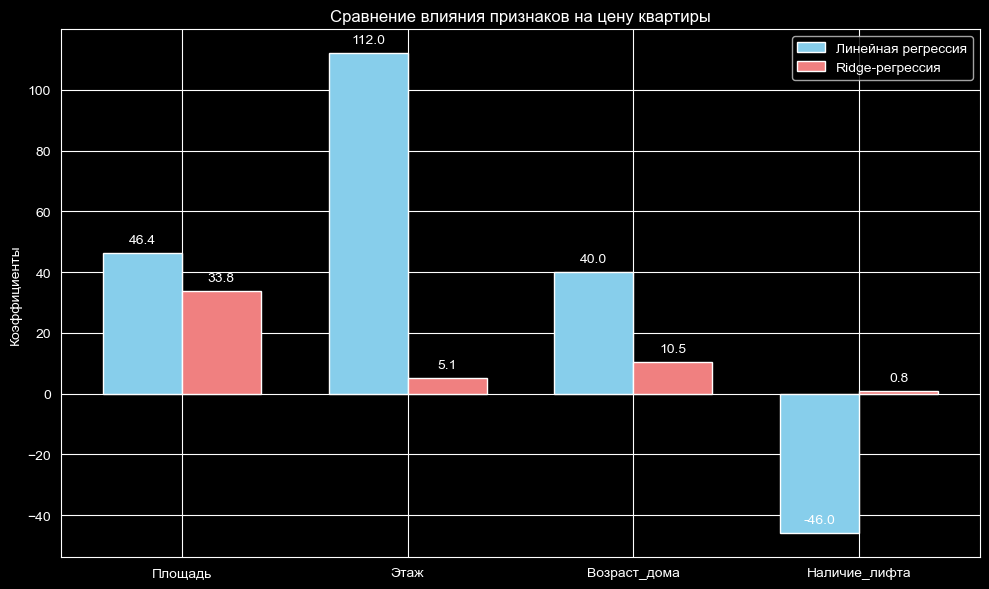

In [8]:
# ВИЗУАЛИЗАЦИЯ влияния признаков
x = np.arange(len(X.columns))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, coef_df["Линейная регрессия"], width, label='Линейная регрессия',
color='skyblue')
rects2 = ax.bar(x + width/2, coef_df["Ridge-регрессия"], width, label='Ridge-регрессия',
color='lightcoral')
ax.set_ylabel('Коэффициенты')
ax.set_title('Сравнение влияния признаков на цену квартиры')
ax.set_xticks(x)
ax.set_xticklabels(coef_df["Признак"])
ax.legend()
# Добавляем значения на столбцы
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}',
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 5), # смещение текста вверх
        textcoords="offset points",
        ha='center', va='bottom')
plt.tight_layout()
plt.show()

Что делает этот код:
1. Создаёт простую выборку с характеристиками квартир, включая площадь, этаж, возраст
дома и наличие лифта.
2. Строит две модели:
- Обычную линейную регрессию
- Ridge-регрессию с регуляризацией
3. Сравнивает влияние признаков (коэффициенты) в обеих моделях.
4. Визуализирует разницу — вы увидите, как Ridge уменьшает "слишком сильное" влияние
признаков (например, наличие лифта).

Как читать график:
- Голубые столбцы — обычная линейная регрессия, где признак "Наличие лифта" может
иметь слишком большое влияние.
- Красные столбцы — Ridge-регрессия, которая "сглаживает" коэффициенты и уменьшает
риск переобучения.

Этот пример показывает, как регуляризация помогает модели не переоценивать
отдельные признаки и становится более устойчивой к случайным выбросам в данных.